#### Let's Start

##### **Importing required libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

**Loading the train.csv dataset into a pandas Dataframe**

In [7]:
# **Load data Dataset** - 5 rows × 78 columns
train_df = pd.read_csv('train.csv')

train_df.head()

C:\Users\darri\AppData\Local\Temp\ipykernel_1040\1579834091.py:2: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


Checking and removing duplicates

In [8]:
# CHECK FOR DUPLICATES =================================

duplicates = train_df.duplicated().sum()
print(f"Duplicates found: {duplicates}")

# Remove duplicates if present
train_df.drop_duplicates(inplace=True)

Duplicates found: 0


Changing "Tranc_YearMonth" column into datetime format

In [9]:
# Date columns
train_df['Tranc_YearMonth'] = pd.to_datetime(train_df['Tranc_YearMonth'])

Creating a new dataframe for the selected features

In [10]:
df = train_df[['id', 'resale_price', 'Tranc_YearMonth','storey_range', 'floor_area_sqm', 'full_flat_type', 
    'hdb_age','town', 'Mall_Nearest_Distance', 'Hawker_Nearest_Distance', 
    'mrt_nearest_distance','bus_stop_nearest_distance', 'pri_sch_nearest_distance','sec_sch_nearest_dist', 'Latitude', 'Longitude']]

In [11]:
# Extracting numeric year and month into separate columns from the 'Tranc_YearMonth'
df['Year'] = df['Tranc_YearMonth'].dt.year
df['Month'] = df['Tranc_YearMonth'].dt.month

C:\Users\darri\AppData\Local\Temp\ipykernel_1040\3227028101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Tranc_YearMonth'].dt.year
C:\Users\darri\AppData\Local\Temp\ipykernel_1040\3227028101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Tranc_YearMonth'].dt.month


In [12]:
# Seperately created a YearMonth column in date format so that each row’s Tranc_YearMonth value 
# and truncating it to the first day of the month(e.g., 2020-01-01)
# delete the column if not required

df['YearMonth'] = df['Tranc_YearMonth'].dt.to_period('M').dt.to_timestamp()

C:\Users\darri\AppData\Local\Temp\ipykernel_1040\4155558144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['Tranc_YearMonth'].dt.to_period('M').dt.to_timestamp()


In [13]:
# Exporting the file as csv

df.to_csv('Updated_dataframe.csv')

##### **Loading Dataset**

In [14]:

df = pd.read_csv('Updated_dataframe.csv')
df.head()


,Unnamed: 0,id,resale_price,Tranc_YearMonth,storey_range,floor_area_sqm,full_flat_type,hdb_age,town,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,Latitude,Longitude,Year,Month,YearMonth
0,0,88471,680000.0,2016-05-01,10 TO 12,90.0,4 ROOM Model A,15,KALLANG/WHAMPOA,1094.090418,154.753357,330.083069,29.427395,1138.633422,1138.633422,1.314299,103.872828,2016,5,2016-05-01
1,1,122598,665000.0,2012-07-01,07 TO 09,130.0,5 ROOM Improved,34,BISHAN,866.941448,640.151925,903.659703,58.207761,415.607357,447.894399,1.346086,103.855078,2012,7,2012-07-01
2,2,170897,838000.0,2013-07-01,13 TO 15,144.0,EXECUTIVE Apartment,24,BUKIT BATOK,1459.579948,1762.082341,1334.251197,214.747860,498.849039,180.074558,1.343867,103.760535,2013,7,2013-07-01
3,3,86070,550000.0,2012-04-01,01 TO 05,103.0,4 ROOM Model A,29,BISHAN,950.175199,726.215262,907.453484,43.396521,389.515528,389.515528,1.358245,103.845504,2012,4,2012-04-01
4,4,153632,298000.0,2017-12-01,01 TO 03,83.0,4 ROOM Simplified,34,YISHUN,729.771895,1540.151439,412.343032,129.422752,401.200584,312.025435,1.414745,103.835532,2017,12,2017-12-01


Dropping the "Unnamed: 0" column

In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,id,resale_price,Tranc_YearMonth,storey_range,floor_area_sqm,full_flat_type,hdb_age,town,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,Latitude,Longitude,Year,Month,YearMonth
0,88471,680000.0,2016-05-01,10 TO 12,90.0,4 ROOM Model A,15,KALLANG/WHAMPOA,1094.090418,154.753357,330.083069,29.427395,1138.633422,1138.633422,1.314299,103.872828,2016,5,2016-05-01
1,122598,665000.0,2012-07-01,07 TO 09,130.0,5 ROOM Improved,34,BISHAN,866.941448,640.151925,903.659703,58.207761,415.607357,447.894399,1.346086,103.855078,2012,7,2012-07-01
2,170897,838000.0,2013-07-01,13 TO 15,144.0,EXECUTIVE Apartment,24,BUKIT BATOK,1459.579948,1762.082341,1334.251197,214.747860,498.849039,180.074558,1.343867,103.760535,2013,7,2013-07-01
3,86070,550000.0,2012-04-01,01 TO 05,103.0,4 ROOM Model A,29,BISHAN,950.175199,726.215262,907.453484,43.396521,389.515528,389.515528,1.358245,103.845504,2012,4,2012-04-01
4,153632,298000.0,2017-12-01,01 TO 03,83.0,4 ROOM Simplified,34,YISHUN,729.771895,1540.151439,412.343032,129.422752,401.200584,312.025435,1.414745,103.835532,2017,12,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,39814,625000.0,2020-09-01,04 TO 06,161.0,EXECUTIVE Apartment,26,WOODLANDS,585.138715,973.725973,713.675852,137.566352,418.983965,189.889876,1.441311,103.792066,2020,9,2020-09-01
150630,147177,455000.0,2017-06-01,04 TO 06,110.0,5 ROOM Improved,20,JURONG WEST,250.084466,1807.769865,239.773531,55.899763,136.298080,614.418470,1.339430,103.697684,2017,6,2017-06-01
150631,179087,733000.0,2020-12-01,10 TO 12,144.0,EXECUTIVE Apartment,28,BEDOK,1790.053482,1076.260436,669.284215,143.388623,512.626814,556.889910,1.331663,103.904626,2020,12,2020-12-01
150632,21309,338000.0,2016-05-01,07 TO 09,59.0,3 ROOM Improved,47,QUEENSTOWN,587.244922,318.550377,502.030710,246.171884,787.250957,832.386515,1.306185,103.796881,2016,5,2016-05-01


##### **Initial Expection**

In [16]:
# Dataset Shape and Information

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   resale_price               150634 non-null  float64
 2   Tranc_YearMonth            150634 non-null  object 
 3   storey_range               150634 non-null  object 
 4   floor_area_sqm             150634 non-null  float64
 5   full_flat_type             150634 non-null  object 
 6   hdb_age                    150634 non-null  int64  
 7   town                       150634 non-null  object 
 8   Mall_Nearest_Distance      149805 non-null  float64
 9   Hawker_Nearest_Distance    150634 non-null  float64
 10  mrt_nearest_distance       150634 non-null  float64
 11  bus_stop_nearest_distance  150634 non-null  float64
 12  pri_sch_nearest_distance   150634 non-null  float64
 13  sec_sch_nearest_dist       15

In [17]:
# Converting 'Tran_YearMonth' into datetime format
df['Tranc_YearMonth'] = pd.to_datetime(df['Tranc_YearMonth'], format='%Y-%m-%d', errors='coerce')

In [18]:
# Checking Columns and Data Types

df.dtypes

id                                    int64
resale_price                        float64
Tranc_YearMonth              datetime64[ns]
storey_range                         object
floor_area_sqm                      float64
full_flat_type                       object
hdb_age                               int64
town                                 object
Mall_Nearest_Distance               float64
Hawker_Nearest_Distance             float64
mrt_nearest_distance                float64
bus_stop_nearest_distance           float64
pri_sch_nearest_distance            float64
sec_sch_nearest_dist                float64
Latitude                            float64
Longitude                           float64
Year                                  int64
Month                                 int64
YearMonth                            object
dtype: object

In [19]:
# Importing all neccessary libraries for the model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Creating the correlation matrix and heatmap**

In [20]:
selected_columns = ['resale_price','floor_area_sqm', 'hdb_age', 'Hawker_Nearest_Distance', 'mrt_nearest_distance', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist']
corr_matrix = df[selected_columns].corr()
corr_matrix

,resale_price,floor_area_sqm,hdb_age,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist
resale_price,1.000000,0.654120,-0.350337,-0.014537,-0.128222,0.031940,-0.011004,0.095339
floor_area_sqm,0.654120,1.000000,-0.283182,0.206886,0.053186,0.006461,-0.113645,-0.063315
hdb_age,-0.350337,-0.283182,1.000000,-0.503202,-0.154657,0.034772,0.181359,0.070921
Hawker_Nearest_Distance,-0.014537,0.206886,-0.503202,1.000000,0.134854,-0.028390,-0.252223,-0.123774
mrt_nearest_distance,-0.128222,0.053186,-0.154657,0.134854,1.000000,0.041003,0.056670,0.007223
bus_stop_nearest_distance,0.031940,0.006461,0.034772,-0.028390,0.041003,1.000000,0.003410,-0.031737
pri_sch_nearest_distance,-0.011004,-0.113645,0.181359,-0.252223,0.056670,0.003410,1.000000,0.191309
sec_sch_nearest_dist,0.095339,-0.063315,0.070921,-0.123774,0.007223,-0.031737,0.191309,1.000000


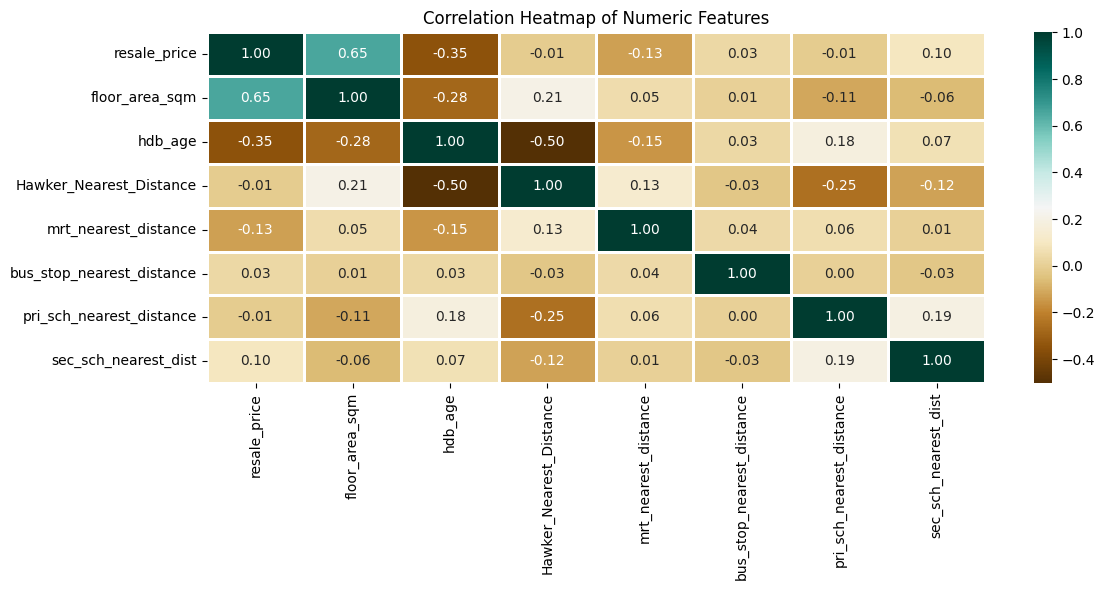

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(
        corr_matrix,
        cmap='BrBG',
        fmt='.2f',
        linewidths=2,
        annot=True
    )
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

## Creating the linear regression model

displaying result after run

In [22]:
# Define features and target variables 
X = df[['storey_range','full_flat_type','town', 'floor_area_sqm', 'hdb_age', 'Hawker_Nearest_Distance', 'mrt_nearest_distance', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist']]
y = df.resale_price

preprocessor = ColumnTransformer([
('onehot', OneHotEncoder(drop='first'), ['storey_range','full_flat_type','town']),  # Encode categorical
('scaler', StandardScaler(), ['floor_area_sqm', 'hdb_age', 'Hawker_Nearest_Distance', 'mrt_nearest_distance', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist'])  # Scale numerical
])
        
# Transform features
X_transformed = preprocessor.fit_transform(X)

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y,random_state=123)

# Train a linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predicting X_test
y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

np.float64(52619.66848525759)

## Calculating the null RMSE

In [23]:
# Null RMSE
y_test.mean()

np.float64(449376.12889880245)

In [24]:
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_train.
y_null.fill(y_train.mean())
y_null

array([449089.95738464, 449089.95738464, 449089.95738464, ...,
       449089.95738464, 449089.95738464, 449089.95738464], shape=(37659,))

In [25]:
# Compute null RMSE.
np.sqrt(metrics.mean_squared_error(y_test, y_null))

np.float64(143573.95352905753)

## Calculating the R square

In [26]:
r2 = r2_score(y_test,y_pred)
print('R-squared:', r2)

R-squared: 0.8656781633211149


# Building a second regression model: Random Forest Regression

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Define features and target variable
X = df[['storey_range','floor_area_sqm','full_flat_type','hdb_age','town','Hawker_Nearest_Distance', 'mrt_nearest_distance', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist']]
y = df['resale_price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Define preprocessing
rf_preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['storey_range','full_flat_type','town']),  # Encode categorical
    ('scaler', StandardScaler(), ['floor_area_sqm', 'hdb_age', 'Hawker_Nearest_Distance', 'mrt_nearest_distance', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist'])  # Scale numerical
])

In [29]:
# Define Random Forest Regression pipeline
rf_pipeline = Pipeline([
    ('preprocessor', rf_preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=123))
])

In [30]:
X_train.shape

(112975, 10)

In [31]:
# Train model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['storey_range',
                                                   'full_flat_type', 'town']),
                                                 ('scaler', StandardScaler(),
                                                  ['floor_area_sqm', 'hdb_age',
                                                   'Hawker_Nearest_Distance',
                                                   'mrt_nearest_distance',
                                                   'bus_stop_nearest_distance',
                                                   'pri_sch_nearest_distance',
                                                   'sec_sch_nearest_dist'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=50, random_state=123))])

In [32]:
rf_y_pred = rf_pipeline.predict(X_test)

#Calculating the RF RMSE
np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred))

np.float64(40448.16384272455)

## Importing joblib and pickle to save the model

In [33]:
import pickle
import joblib

Saving the linear regression model into joblib

Saving the Random Forest regression model into joblib

In [34]:
# saving the preprocessor and trained model
joblib.dump(rf_pipeline, 'rf_model.pkl')
joblib.dump(rf_preprocessor, 'rf_preprocessor.pkl')

['rf_preprocessor.pkl']

## Testing the train model against the test.csv file

In [35]:
# Loading the test csv file as a dataframe
test_data = pd.read_csv("Updated_test_dataframe.csv")
test_data.dtypes

id                             int64
flat_type                     object
storey_range                  object
floor_area_sqm               float64
full_flat_type                object
hdb_age                        int64
town                          object
Mall_Nearest_Distance        float64
Hawker_Nearest_Distance      float64
mrt_nearest_distance         float64
bus_stop_nearest_distance    float64
pri_sch_nearest_distance     float64
sec_sch_nearest_dist         float64
Latitude                     float64
Longitude                    float64
dtype: object

In [36]:
# Load saved preprocessor and model
rf_model = joblib.load('rf_model.pkl')
rf_preprocessor = joblib.load('rf_preprocessor.pkl')

# Transform new data
X_new = test_data[['storey_range','floor_area_sqm','full_flat_type','hdb_age','town','Hawker_Nearest_Distance', 'mrt_nearest_distance', 'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist']]

# Predicting new data 
predicted_prices = rf_model.predict(X_new)

# Addin the new column back into the dataframe
test_data['predicted_prices']= predicted_prices
test_data['predicted_prices'] = round(test_data['predicted_prices'],2)
test_data

,id,flat_type,storey_range,floor_area_sqm,full_flat_type,hdb_age,town,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,Latitude,Longitude,predicted_prices
0,114982,4 ROOM,07 TO 09,84.0,4 ROOM Simplified,34,YISHUN,877.431572,687.576779,686.660434,75.683952,426.467910,156.322353,1.437066,103.831121,310868.33
1,95653,5 ROOM,04 TO 06,112.0,5 ROOM Premium Apartment,13,JURONG WEST,534.037705,2122.346226,169.478175,88.993058,439.756851,739.371688,1.336957,103.695668,501459.27
2,40303,3 ROOM,07 TO 09,68.0,3 ROOM New Generation,41,ANG MO KIO,817.050453,152.287621,694.220448,86.303575,355.882207,305.071191,1.374058,103.854168,280328.63
3,109506,4 ROOM,01 TO 03,97.0,4 ROOM New Generation,42,WOODLANDS,1272.737194,501.892158,1117.203587,108.459039,929.744711,433.454591,1.442748,103.772922,302890.00
4,100149,4 ROOM,16 TO 18,103.0,4 ROOM Model A,36,BUKIT BATOK,1070.963675,437.593564,987.976010,113.645431,309.926934,217.295361,1.346556,103.740101,415967.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,23347,3 ROOM,04 TO 06,82.0,3 ROOM New Generation,41,ANG MO KIO,1120.535819,226.144646,674.098299,76.352127,556.368531,320.543569,1.379395,103.839157,387952.19
16733,54003,4 ROOM,16 TO 18,92.0,4 ROOM Premium Apartment,9,PUNGGOL,519.046576,4254.303044,452.475847,81.731727,149.376171,423.996711,1.405079,103.906706,516452.92
16734,128921,5 ROOM,04 TO 06,110.0,5 ROOM Improved,19,CHOA CHU KANG,685.922630,3917.745229,739.510043,101.163779,208.840038,560.399339,1.404117,103.748355,428209.71
16735,69352,4 ROOM,07 TO 09,84.0,4 ROOM Simplified,33,BISHAN,846.849200,773.521588,877.694888,98.358542,300.015596,324.050692,1.347252,103.855465,481277.62


Extracting the 'id' and 'predicted price' column for kaggle submission

In [37]:
kaggle = test_data[['id','predicted_prices']]
kaggle

,id,predicted_prices
0,114982,310868.33
1,95653,501459.27
2,40303,280328.63
3,109506,302890.00
4,100149,415967.00
...,...,...
16732,23347,387952.19
16733,54003,516452.92
16734,128921,428209.71
16735,69352,481277.62


Conveting to csv file for the test file with predicted resale values

In [38]:
test_data.to_csv('test_data.csv', index=False)


Converting to csv file for kaggle usage

In [39]:
kaggle.to_csv('predicted_values.csv', index=False)